In [2]:
import numpy as np

def wiener_process(T=1.0, dT = 0.0001, seed=None):
    np.random.seed(seed)

    N = int(1 / dT)

    t = np.linspace(0, T, N, dtype=float)
    dW = np.sqrt(dT) * np.random.randn(N)

    W = np.cumsum(dW, dtype=float)

    return t, W

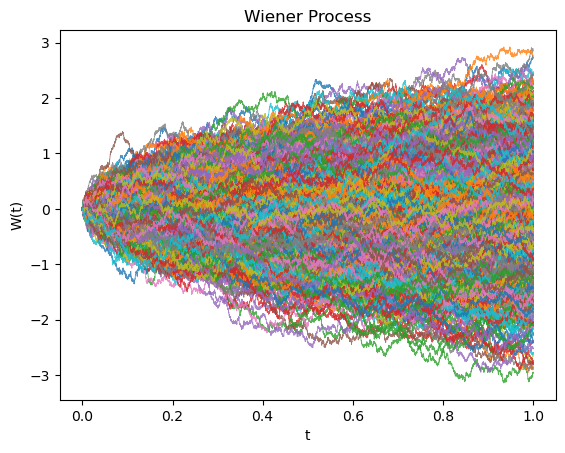

In [23]:
import matplotlib.pyplot as plt

n_trajectories = 1000

for i in range(n_trajectories):
    t, W = wiener_process(T=1.0, dT = 0.0001, seed=None) # Можно передать сид, иначе случайный
    plt.plot(t, W, linewidth=0.6, alpha=0.8)

plt.title('Wiener Process')
plt.xlabel('t')
plt.ylabel('W(t)')
# plt.show()
plt.savefig("wiener.png")

In [12]:
def ornshtein_ulenbek_process(T=1.0, V0=10.0, k=10.0, theta=50.0, q=1, dT=0.0001, seed=None):
    np.random.seed(seed)
    
    N = int(1 / dT)
    t = np.linspace(0, T, N, dtype=float)

    dW = np.sqrt(dT) * np.random.randn(N)

    V = np.empty(N, dtype=float)
    V[0] = V0

    # dv(t) = k(theta - v(t))dt + q sqrt(v(t)) dW
    for i in range(1, N):
        V[i] = V[i-1] + k * (theta - V[i-1]) * dT + q*np.sqrt(np.max(V[i-1], 0))*dW[i-1]

    return t, V

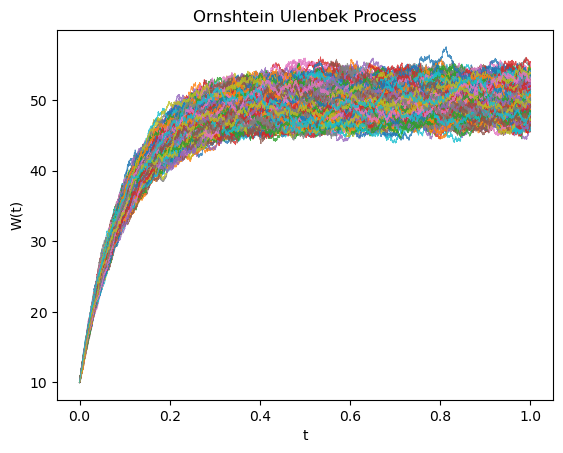

In [24]:
import matplotlib.pyplot as plt

n_trajectories = 1000

for i in range(n_trajectories):
    t, W = ornshtein_ulenbek_process(T=1.0, V0=10.0, k=10.0, theta=50.0, q=1, dT=0.0001) # Можно передать сид, иначе случайный
    plt.plot(t, W, linewidth=0.6, alpha=0.8)

plt.title('Ornshtein Ulenbek Process')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.yscale('linear')
# plt.show()
plt.savefig("ornshtein.png")